## 1. 데이터 불러오기

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_apartment = pd.read_csv('./data/Apart Deal.csv', thousands=',')

#한글 폰트 설정 - mac 환경을 위한 폰트 설정
from matplotlib import rc
rc('font', family='AppleGothic')

/var/folders/3h/f28l_h7n3rdf1ffk62lr2qrw0000gn/T/ipykernel_86765/2349784507.py:6: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_apartment = pd.read_csv('./data/Apart Deal.csv', thousands=',')


- 경고: 6번째, 8번째 컬럼의 데이터 형이 섞여 있음 - 명시적 형변환 필요
- '거래금액' 컬럼에 천단위 자리 구분 기호(,)가 들어 있어 전처리에 오류가 발생하므로 thousands=',' 옵션을 주어 제거함

## 2. 데이터 확인

In [195]:
df_apartment.head()

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
0,31110,학성동,5/30/2020 0:00,남운학성타운,379,136,8,1991,26700
1,31110,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,102,2,2006,35500
2,31110,남외동,1/3/2020 0:00,에일린의뜰,500,85,11,2007,36500
3,31110,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,119,8,2006,43000
4,31110,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,85,7,2007,38700


In [196]:
# 행 개수, 열 개수 살펴보기
df_apartment.shape

(5002839, 9)

사용할 데이터는 5002839개의 행과 9개의 열을 가진 데이터

In [197]:
#컬럼 정보 살펴보기
df_apartment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5002839 entries, 0 to 5002838
Data columns (total 9 columns):
 #   Column  Dtype  
---  ------  -----  
 0   지역코드    float64
 1   법정동     object 
 2   거래일     object 
 3   아파트     object 
 4   지번      object 
 5   전용면적    float64
 6   층       object 
 7   건축년도    float64
 8   거래금액    int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 343.5+ MB


종속변수로 사용할 컬럼은 '거래금액'

선형회귀분석에 독립변수로 사용한 만한 컬럼은 '전용면적', '층', '건축년도'
- '층', '거래금액' 컬럼은 이산적 수치형 데이터임에도 object 형으로 기록되어 있음. .astype() 메소드를 사용해 형변환

In [198]:
# '층' 컬럼 데이터 타입 변경하기
import numpy as np

# 비어 있는 문자열 값 때문에 오류가 발생하므로 공백을 np.nan으로 변경
df_apartment['층'] = df_apartment['층'].replace(' ', np.nan)

# '층' 컬럼의 데이터 타입을 float64로 변경 - np.nan이 있으므로 float64로 변경
df_apartment['층'] = df_apartment['층'].astype('float64')

In [199]:
#형변환 결과 확인
df_apartment['층'].dtype

dtype('float64')

In [200]:
# '거래금액' 컬럼의 데이터 타입을 float64로 변경 - 결측치가 있으므로 float64로 변경   
df_apartment['거래금액'] = df_apartment['거래금액'].astype('float64')

#형변환 결과 확인
df_apartment['거래금액'].dtype

dtype('float64')

### 결측치 개수 확인

In [201]:
# 결측치 확인
df_apartment.isnull().sum()

지역코드      0
법정동       0
거래일       0
아파트       0
지번      438
전용면적      0
층         1
건축년도     76
거래금액      0
dtype: int64

- '지번' 컬럼과 '층' 컬럼, '건축년도' 컬럼에 결측치가 있음

<Axes: >

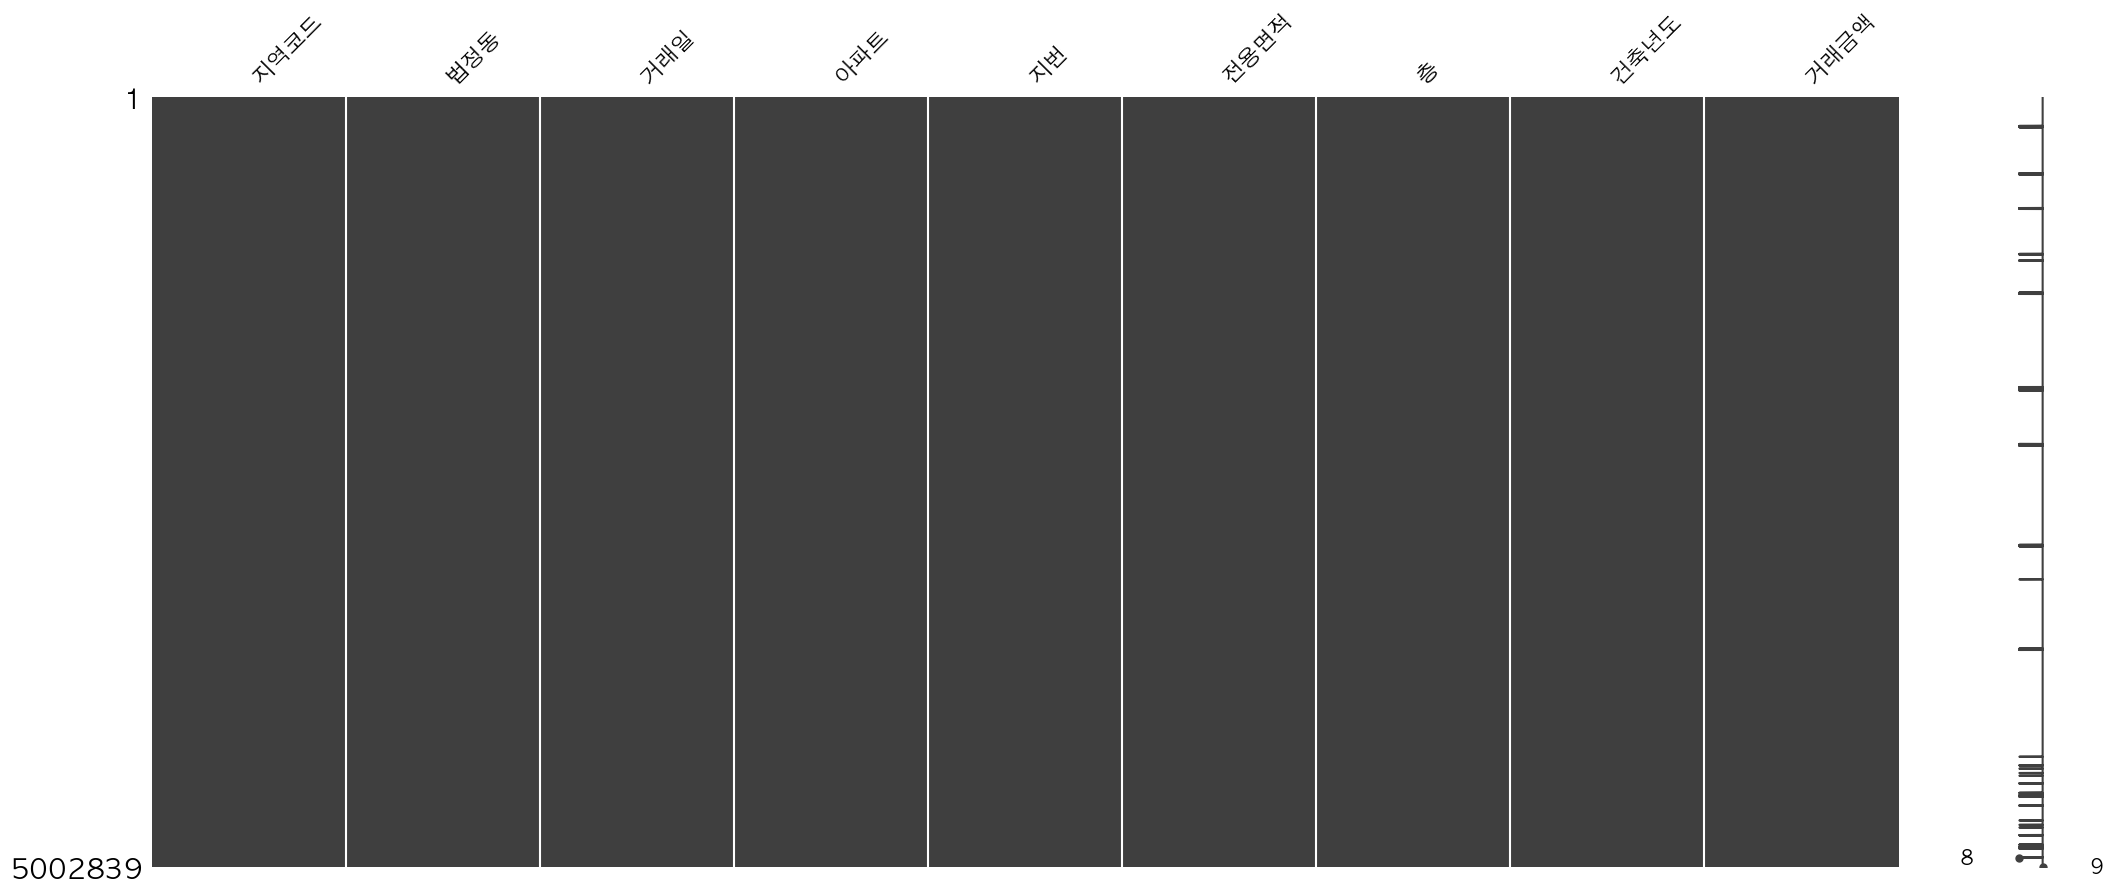

In [202]:
# 결측치 시각화
import missingno as msno

msno.matrix(df_apartment)

<Axes: >

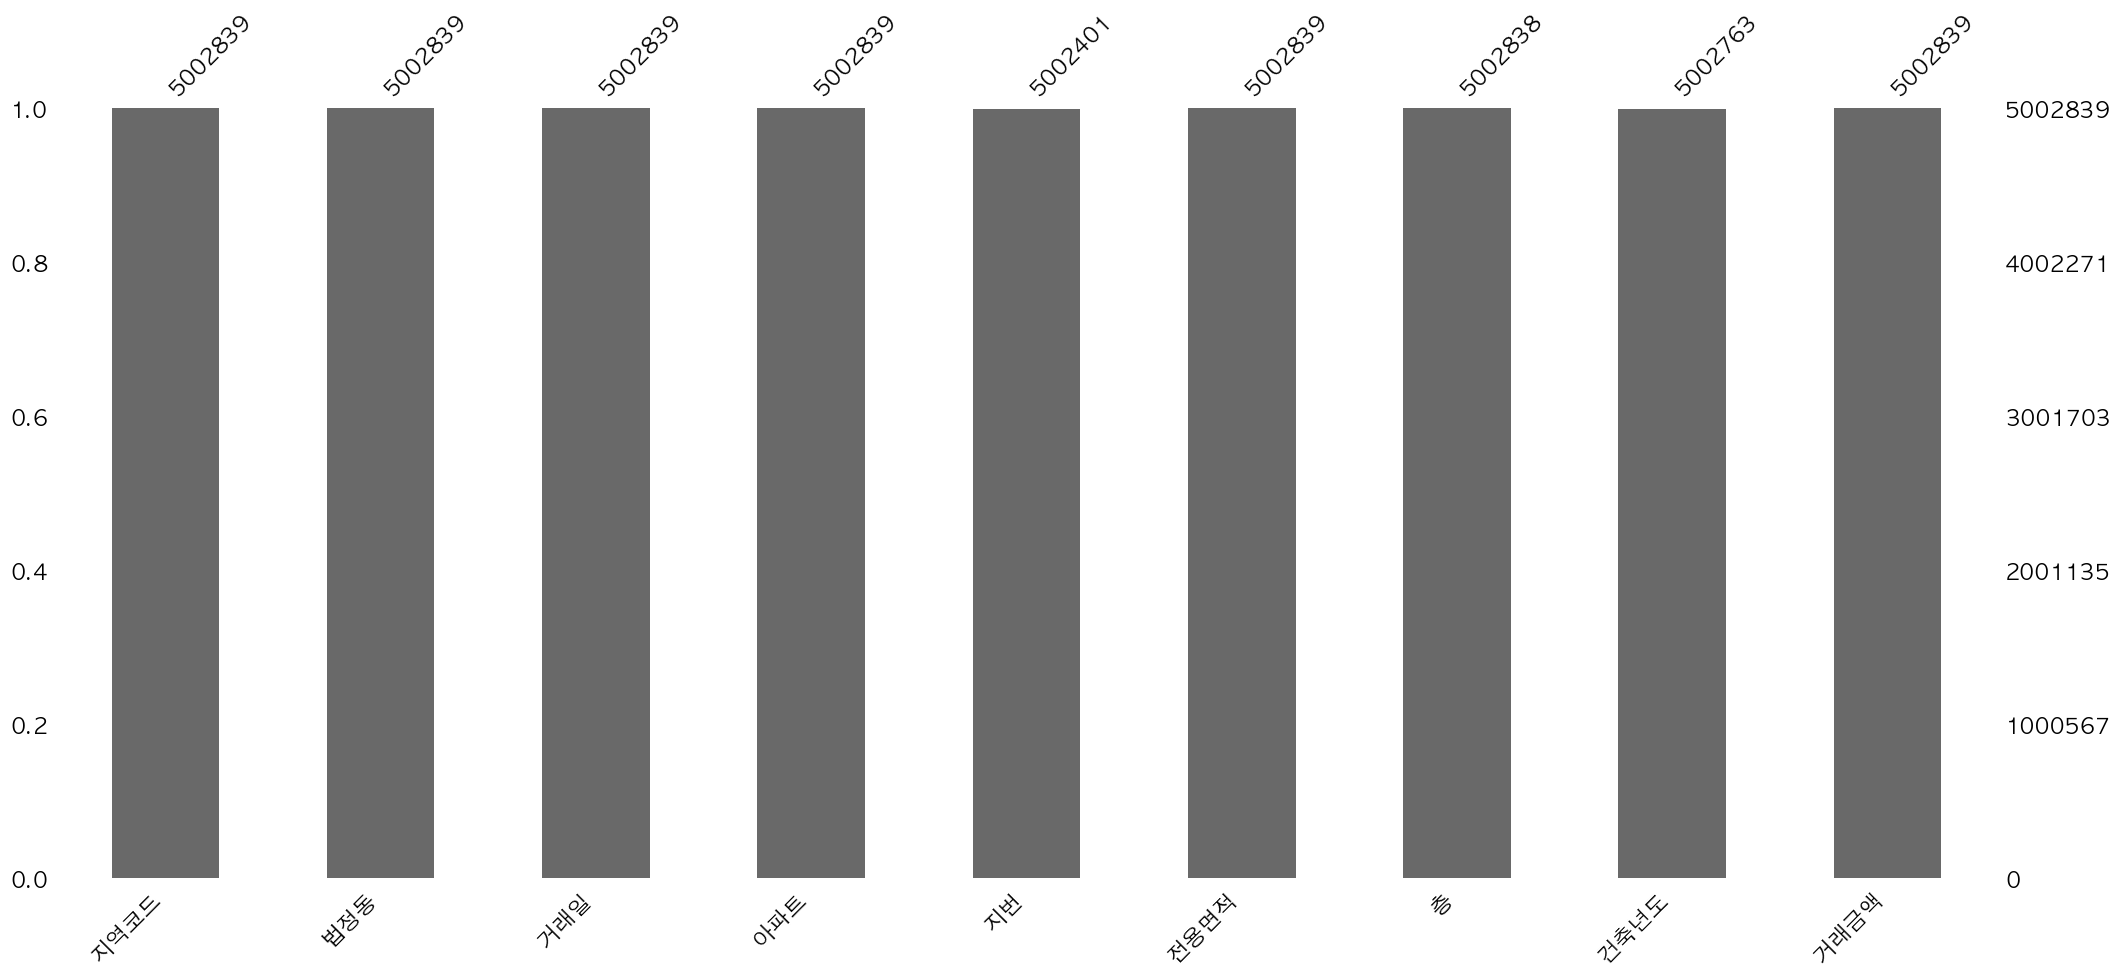

In [203]:
msno.bar(df_apartment)

- 결측치 개수가 매우 적으므로 결측치 시각화 자료에서는 드러나지 않음

[결측치 처리를 위해 고려해야 할 사항]

1. '지번' 컬럼은 선형회귀 분석에 사용하기 적절치 못한 컬럼이므로 독립변수로 사용하지 않을 것임
2. '건축년도' 컬럼은 독립변수로 사용할 것이므로 결측치 처리 필요
    - 결측치 개수(76개)가 전체 데이터 개수(5002839개)에 비해서 매우 적으므로 dropna() 사용
3. '층' 컬럼 또한 결측치가 1개밖에 되지 않으므로 dropna()로 제거

In [227]:
# '층', '건축년도' 컬럼에서 결측치가 있는 행 제거
df_apartment = df_apartment.dropna(subset=['건축년도', '층'], how='any', axis=0)

# 결측치 확인
df_apartment.isnull().sum()

지역코드      0
법정동       0
거래일       0
아파트       0
지번      438
전용면적      0
층         0
건축년도      0
거래금액      0
dtype: int64

## 3. 데이터 분포 확인

'전용면적', '층', '건축년도' 세 가지 컬럼을 독립변수로, '거래금액' 컬럼을 종속변수로 사용할 것이므로, 해당 컬럼들에 대해 아래 3가지 항목을 확인
1. 기술통계량
2. 데이터 분포
3. 상관계수 확인

In [205]:
# 정수 표기법으로 describe() 메소드 실행

pd.options.display.float_format = '{:.0f}'.format
df_apartment[['전용면적', '층', '건축년도']].describe()

,전용면적,층,건축년도
count,5002763,5002762,5002763
mean,75,9,2002
std,26,6,9
min,9,-4,1961
25%,60,4,1995
50%,77,8,2001
75%,85,13,2009
max,424,83,2023


- '층' 값에 음수 값이 있음. 이상치로 의심하여 분포 확인

In [209]:
#값이 음수인 '층' 컬럼의 데이터 수 확인

df_apartment[df_apartment['층'] < 0]['층'].value_counts()

층
-1    230
-2     23
-3      8
-4      1
Name: count, dtype: int64

-1, -2, -3, -4층으로 분류된 데이터가 다수 존재함을 확인. 

잘못 기입된 이상치가 아니라 지하층에 존재하는 아파트 거주지를 나타낸 값으로 추정

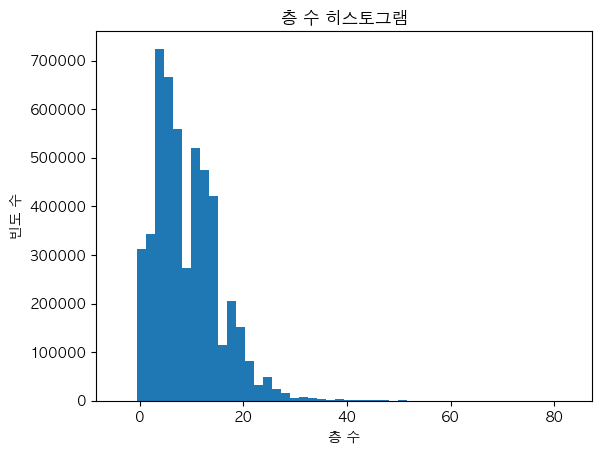

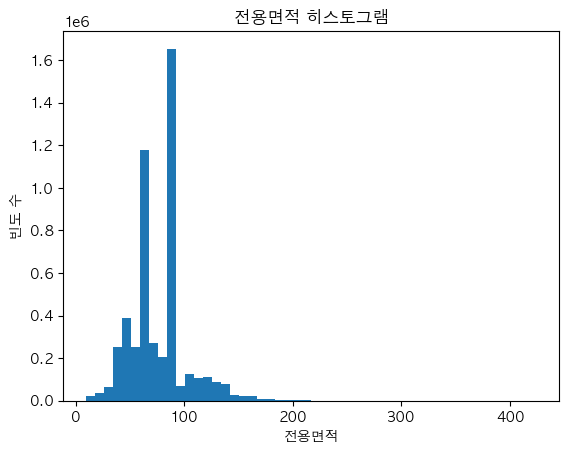

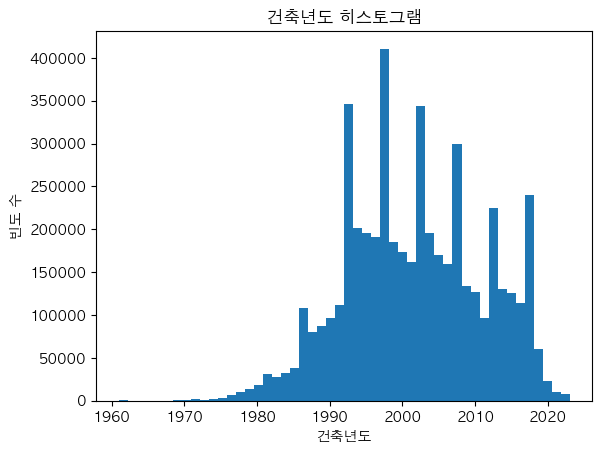

In [213]:
# '층', '전용면적', '건축년도' 컬럼 히스토그램 시각화

plt.hist(df_apartment['층'], bins=50)
plt.title('층 수 히스토그램')
plt.xlabel('층 수')
plt.ylabel('빈도 수')
plt.show()

plt.hist(df_apartment['전용면적'], bins=50)
plt.title('전용면적 히스토그램')
plt.xlabel('전용면적')
plt.ylabel('빈도 수')
plt.show()

plt.hist(df_apartment['건축년도'], bins=50)
plt.title('건축년도 히스토그램')
plt.xlabel('건축년도')
plt.ylabel('빈도 수')
plt.show()

## 4. 상관관계 확인

In [220]:
df_apartment[['층', '전용면적', '건축년도', '거래금액']].corr()

,층,전용면적,건축년도
층,1,0,0
전용면적,0,1,0
건축년도,0,0,1


<Axes: >

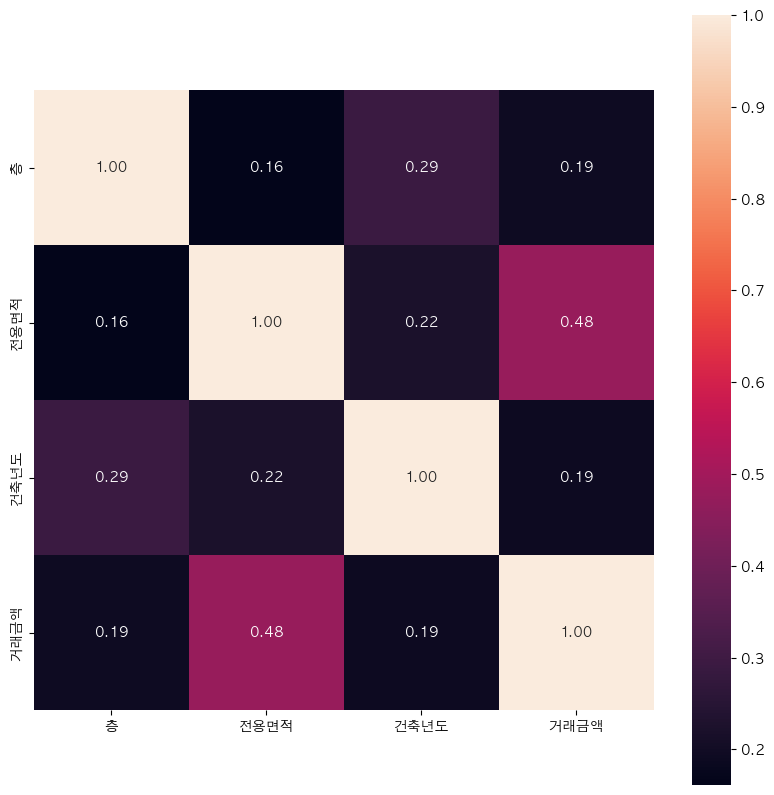

In [221]:
# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 10))

sns.heatmap(df_apartment[['층', '전용면적', '건축년도', '거래금액']].corr(), annot=True, fmt='.2f', square=True)
plt.show()

- 독립변수로 사용할 컬럼들의 종속변수와의 상관관계가 그다지 높지 않음
- 선형회귀 모델이 충분한 설명력을 갖지 못할 것으로 추정

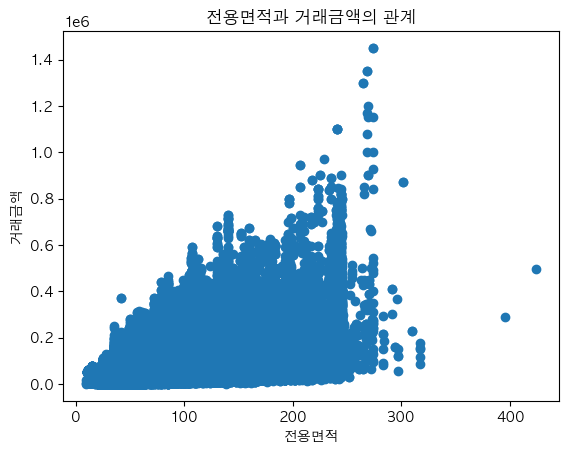

In [219]:
# '거래금액'과 '전용면적'의 관계 시각화

plt.scatter(df_apartment['전용면적'], df_apartment['거래금액'])
plt.title('전용면적과 거래금액의 관계')
plt.xlabel('전용면적')
plt.ylabel('거래금액')
plt.show()

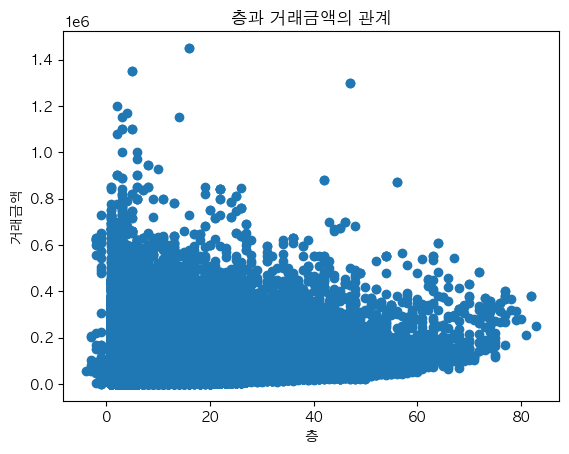

In [223]:
# '거래금액'과 '층'의 관계 시각화

plt.scatter(df_apartment['층'], df_apartment['거래금액'])
plt.title('층과 거래금액의 관계')
plt.xlabel('층')
plt.ylabel('거래금액')
plt.show()

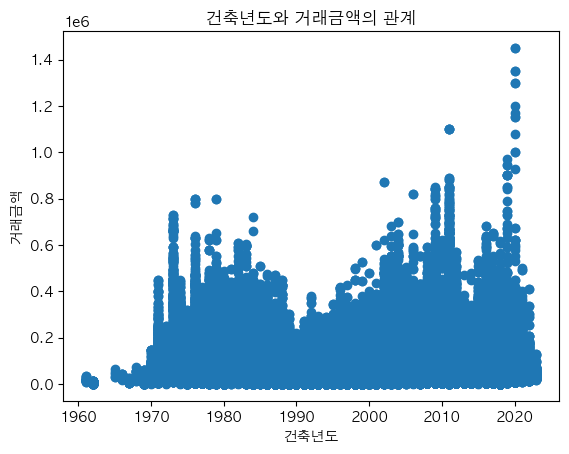

In [224]:
# '건축년도'과 '층'의 관계 시각화

plt.scatter(df_apartment['건축년도'], df_apartment['거래금액'])
plt.title('건축년도와 거래금액의 관계')
plt.xlabel('건축년도')
plt.ylabel('거래금액')
plt.show()

- 상관계수에서 유추할 수 있듯 각각의 독립변수와 종속변수 사이의 분포를 시각화했을 때에도 눈에 띄는 상관성이 보이지 않음

## 5. 선형회귀 모델 구축

In [233]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X = df_apartment[['전용면적', '층', '건축년도']].values
Y = df_apartment['거래금액']

model.fit(X, Y)

LinearRegression()

In [268]:
coef = model.coef_               # 직선의 기울기(a)
intercept = model.intercept_     # 직선의 절편(b)
score = model.score(X, Y)        # 추정된 회귀직선의 정확도(결정계수 r2)
print(f"선형회귀직선: y = {coef[0]:.2f}x + {intercept: .2f}")

#모델 평가 지표

from sklearn.metrics import mean_squared_error, mean_absolute_error

print(f"선형회귀직선의 관계점수(R2): {score: .2f}")
print(f"선형회귀직선의 평균제곱오차(MSE): {mean_squared_error(Y, model.predict(X)): .2f}")
print(f"선형회귀직선의 평균절대오차(MAE): {mean_absolute_error(Y, model.predict(X)): .2f}")
print(f"선형회귀직선의 RMSE(Root Mean Squared Error): {np.sqrt(mean_squared_error(Y, model.predict(X))): .2f}")

선형회귀직선: y = 492.97x + -376061.45
선형회귀직선의 관계점수(R2):  0.25
선형회귀직선의 평균제곱오차(MSE):  618235010.65
선형회귀직선의 평균절대오차(MAE):  14537.65
선형회귀직선의 RMSE(Root Mean Squared Error):  24864.33


- 선형회귀 모델의 설명력을 나타내는 관계점수(R2) 값이 0.25로 낮은 설명력을 보임. 
- 데이터를 통해 얻을 수 있는 설명력이 충분하지 못한 것으로 추정

#### 모델이 충분한 설명력을 갖지 못하는 이유
1. 부동산 가격은 선형회귀모델의 한계상 독립변수로 포함되지 못하는 '지역' 정보에 영향을 많이 받음. 같은 평수와 같은 층수더라도 서울의 집값이 지방의 집값보다 매우 높음.
2. 부동산은 자산으로 취급되므로 가격이 시간 흐름에 따른 인플레이션 영향을 크게 받음. 그러나 본 모델에서는 시간 컬럼의 입력 형식이 일관되지 않아 독립변수로 포함되지 못하였음.

위 두 가지 이유가 크게 작용했을 것으로 추정

#### 랜덤포레스트 모델의 성능

In [274]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

model_RF = RandomForestRegressor()

model_RF.fit(X, Y)

0.8087996833427733

In [276]:
score = model_RF.score(X, Y)
predict = model_RF.predict(X)

print(f"랜덤포레스트 모델의 관계점수(R2): {score: .2f}")
print(f"랜덤포레스트 모델의 평균제곱오차(MSE): {mean_squared_error(Y, predict): .2f}")
print(f"랜덤포레스트 모델의 평균절대오차(MAE): {mean_absolute_error(Y, predict): .2f}")
print(f"랜덤포레스트 모델의 RMSE(Root Mean Squared Error): {np.sqrt(mean_squared_error(Y, predict)): .2f}")

랜덤포레스트 모델의 관계점수(R2):  0.81
랜덤포레스트 모델의 평균제곱오차(MSE):  156896364.44
랜덤포레스트 모델의 평균절대오차(MAE):  6423.90
랜덤포레스트 모델의 RMSE(Root Mean Squared Error):  12525.83


#### XGBoost 모델의 성능

In [272]:
model_XGB = XGBRegressor()

model_XGB.fit(X, Y)

model_XGB.score(X, Y)

0.4434157478392001

In [ ]:
score = model_XGB.score(X, Y)
predict = model_XGB.predict(X)

print(f"랜덤포레스트 모델의 관계점수(R2): {score: .2f}")
print(f"랜덤포레스트 모델의 평균제곱오차(MSE): {mean_squared_error(Y, predict): .2f}")
print(f"랜덤포레스트 모델의 평균절대오차(MAE): {mean_absolute_error(Y, predict): .2f}")
print(f"랜덤포레스트 모델의 RMSE(Root Mean Squared Error): {np.sqrt(mean_squared_error(Y, predict)): .2f}")

## 6. 모델을 사용한 예측

In [264]:
price_predict = model.predict([[124.57, 4, 2002]])[0] * 10000

price_predict = format(int(price_predict), ',') 

print(f'2002년 준공, 4층, 전용면적 124 제곱미터인 아파트의 거래금액 예측값: {price_predict}원')

2002년 준공, 4층, 전용면적 124 제곱미터인 아파트의 거래금액 예측값: 529,787,605원


의아하게도 현재 해당 아파트의 거래가격 5억 3,500만원에 매우 근접한 예측값을 얻음. 우연의 일치로 판단.

In [275]:
price_predict = model_RF.predict([[124.57, 4, 2002]])[0] * 10000

price_predict = format(int(price_predict), ',') 

print(f'2002년 준공, 4층, 전용면적 124 제곱미터인 아파트의 거래금액 예측값: {price_predict}원')

2002년 준공, 4층, 전용면적 124 제곱미터인 아파트의 거래금액 예측값: 416,808,038원


In [273]:
price_predict = model_XGB.predict([[124.57, 4, 2002]])[0] * 10000

price_predict = format(int(price_predict), ',') 

print(f'2002년 준공, 4층, 전용면적 124 제곱미터인 아파트의 거래금액 예측값: {price_predict}원')

2002년 준공, 4층, 전용면적 124 제곱미터인 아파트의 거래금액 예측값: 457,060,625원
